In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [58]:
# Load the dataset
file_path = 'Cleaned_Steam_Dataset.xlsx'
df = pd.read_excel(file_path)


In [60]:
# Selecting features and target variable
X = df[['Game\'s Age (Days)', 'Price', 'Followers', 'User Reviews Count']]  # Independent variables
y = df['Net Revenue (in million $)']  # Dependent variable

In [62]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Polynomial transformation
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [66]:
# Creating and fitting the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [68]:
# Making predictions on the test set
y_pred = model.predict(X_test_poly)

In [70]:
# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [90]:
# Displaying the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 9575.86003093467
R^2 Score: 0.38186997537787204


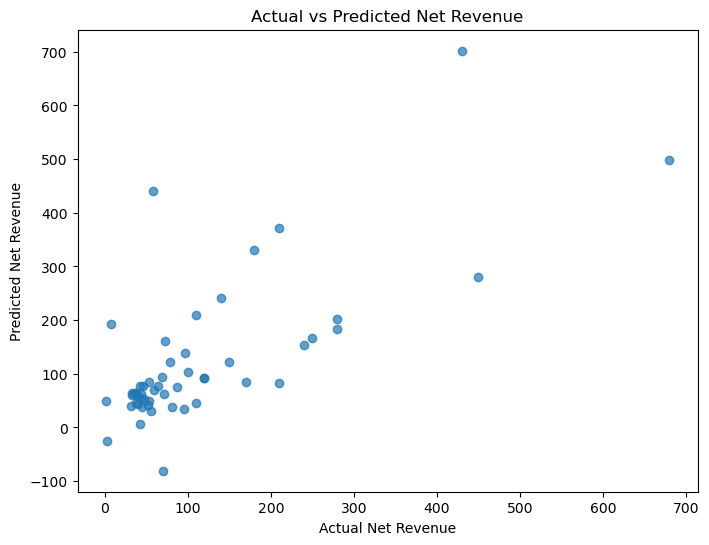

In [96]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Net Revenue')
plt.ylabel('Predicted Net Revenue')
plt.title('Actual vs Predicted Net Revenue')
plt.show()


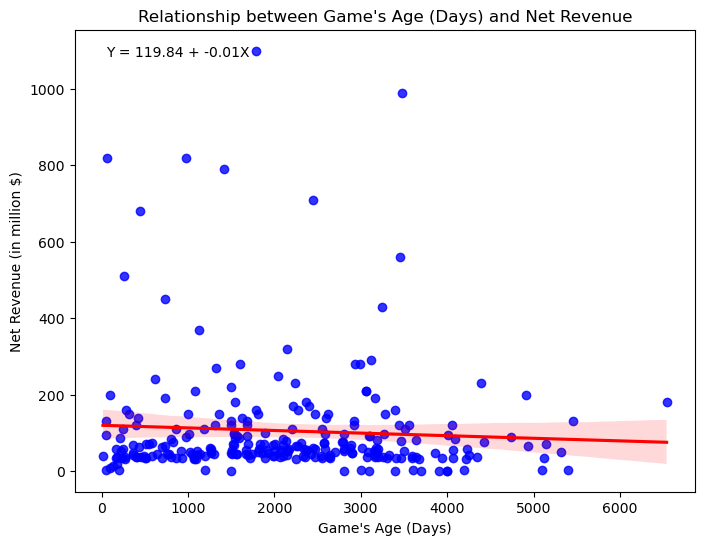

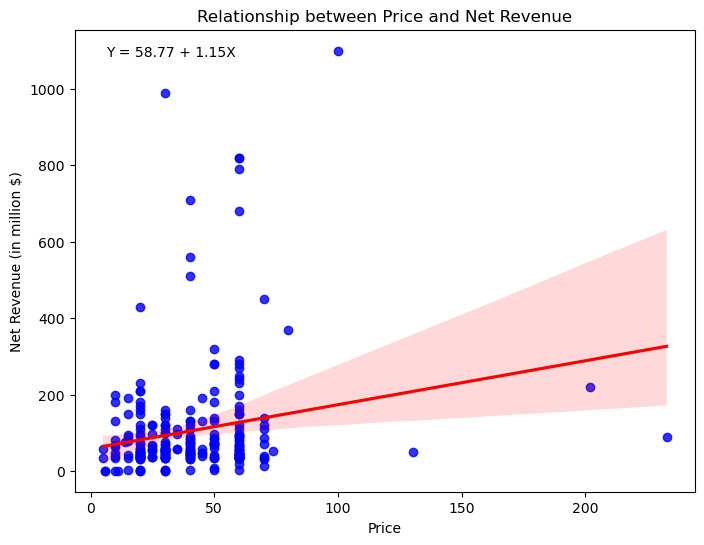

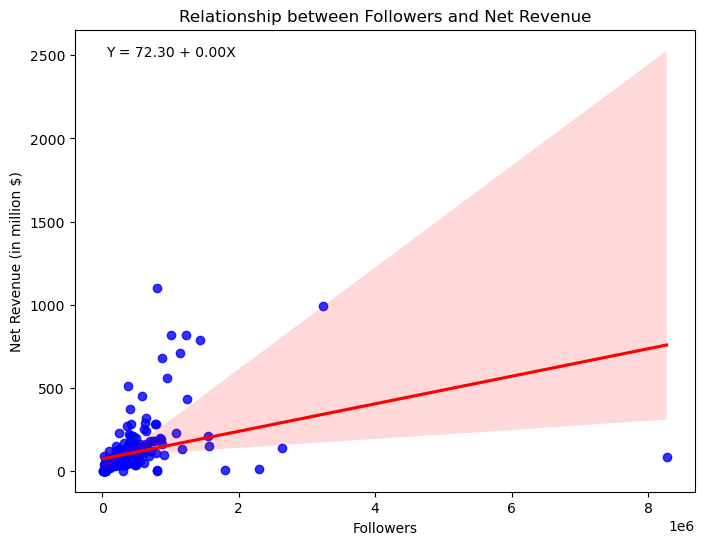

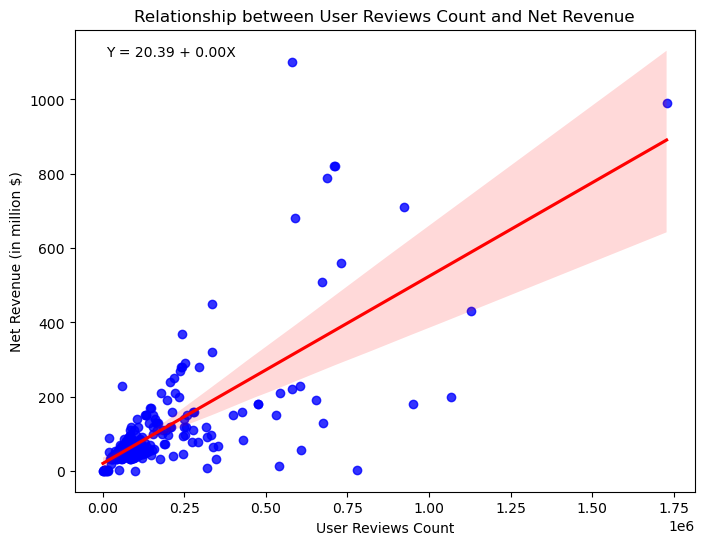

In [98]:
# Visualizing relationships between each feature and the target variable
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[feature], y=y, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    
    # Calculating regression parameters for annotation
    slope, intercept = np.polyfit(df[feature], y, 1)
    plt.text(0.05, 0.95, f'Y = {intercept:.2f} + {slope:.2f}X', 
             horizontalalignment='left', verticalalignment='center', 
             transform=plt.gca().transAxes)
    
    plt.title(f'Relationship between {feature} and Net Revenue')
    plt.xlabel(feature)
    plt.ylabel('Net Revenue (in million $)')
    plt.show()

In [100]:
# Predicting for a new game data sample
new_data = [[1500, 59.99, 500000, 800000]]  # Example input
new_data_poly = poly_features.transform(new_data)
new_prediction = model.predict(new_data_poly)
print(f"Prediction for new data: {new_prediction[0]}")

Prediction for new data: 727.3818952162951


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
Prediction for New Data:
For a game with the following characteristics:
Age: 1500 days
Price: $59.99
Followers: 500,000
User Reviews Count: 800,000
Predicted Net Revenue: $727.38 million